## Question 1

## Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the cleaned dataset 

In [2]:
datacomb=pd.read_csv("../Coursework/datacomb.csv")

In [4]:
#Checking the first 5 rows of datacomb
datacomb.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2006,1,11,3,743.0,745,1024.0,1018,US,...,45,13,0,NaN,0,0,0,0,0,0
1,1,2006,1,11,3,1053.0,1053,1313.0,1318,US,...,27,19,0,NaN,0,0,0,0,0,0
2,2,2006,1,11,3,1915.0,1915,2110.0,2133,US,...,4,11,0,NaN,0,0,0,0,0,0
3,3,2006,1,11,3,1753.0,1755,1925.0,1933,US,...,16,10,0,NaN,0,0,0,0,0,0
4,4,2006,1,11,3,824.0,832,1015.0,1015,US,...,27,12,0,NaN,0,0,0,0,0,0


It is visible that there is an unnamed column in the dataset1!

In [5]:
#removing the unnamed column from the combined dataset
datacomb = datacomb.iloc[: , 1:]

Since we need to use the ArrDelay,DepDelay columns in this question, we have to remove the missing values in those columns

In [6]:
#removing the missing values in ArrDelay column
datacomb = datacomb[pd.notnull(datacomb['ArrDelay'])]

In [7]:
#removing missing values in DepDelay column
datacomb = datacomb[pd.notnull(datacomb['DepDelay'])]

## Finding the best dayofweek to minimise delays

In [26]:
#DayOfWeek is grouped by the averages of DepDelay and ArrDelay
avgdelays_weekday=datacomb.groupby('DayOfWeek')['ArrDelay','DepDelay'].mean().reset_index()

<ipython-input-26-a32795bd3f07>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avgdelays_weekday=datacomb.groupby('DayOfWeek')['ArrDelay','DepDelay'].mean().reset_index()


In [27]:
avgdelays_weekday

,DayOfWeek,ArrDelay,DepDelay
0,1,9.701697,11.106484
1,2,7.248419,8.532392
2,3,8.987949,9.771903
3,4,12.141546,12.314958
4,5,12.701592,13.298945
5,6,5.513338,8.620799
6,7,9.247210,11.074628


In [29]:
#The Columns of  are renamed appropriately
avgdelays_weekday=avgdelays_weekday.rename(columns={'ArrDelay':'AvgArrDelay','DepDelay':'AvgDepDelay'})

In [31]:
#DayOfWeek is set as the index of the pivottable
avgdelays_weekday.set_index('DayOfWeek')

,AvgArrDelay,AvgDepDelay
DayOfWeek,,
1,9.701697,11.106484
2,7.248419,8.532392
3,8.987949,9.771903
4,12.141546,12.314958
5,12.701592,13.298945
6,5.513338,8.620799
7,9.247210,11.074628


In [33]:
#Average of both AvgDepDelay and AvgArrDelay are taken to visualise it more effectively 
AvgofDelays=(avgdelays_weekday.AvgArrDelay + avgdelays_weekday.AvgDepDelay)/2

## Plotting a line plot

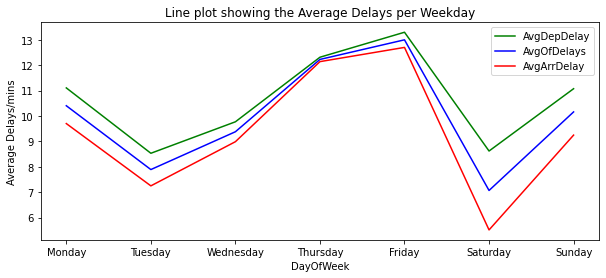

In [40]:
fig, ax=plt.subplots(figsize=(10,4))
ax.plot(avgdelays_weekday['DayOfWeek'],avgdelays_weekday['AvgDepDelay'],color='green',label='AvgDepDelay')
ax.plot(avgdelays_weekday['DayOfWeek'],AvgofDelays,color='blue',label='AvgOfDelays')
ax.plot(avgdelays_weekday['DayOfWeek'],avgdelays_weekday['AvgArrDelay'],color='red',label='AvgArrDelay')
plt.xticks(avgdelays_weekday['DayOfWeek'],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_ylabel('Average Delays/mins')
ax.set_xlabel('DayOfWeek')
ax.title.set_text('Line plot showing the Average Delays per Weekday')
ax.legend()
plt.show()

Saturday is the best dayofweek to minimise delays

## Finding the Best Month to minimise Delays

In [35]:
# Month is grouped by the averages of ArrDelay and DepDelay
avgdelays_month=datacomb.groupby('Month')['ArrDelay','DepDelay'].mean().reset_index()

<ipython-input-35-0eb097a3afa8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avgdelays_month=datacomb.groupby('Month')['ArrDelay','DepDelay'].mean().reset_index()


In [36]:
avgdelays_month

,Month,ArrDelay,DepDelay
0,1,7.447214,9.186764
1,2,10.498488,11.595069
2,3,9.027273,10.779701
3,4,7.491780,9.134426
4,5,6.964127,8.404951
5,6,14.152992,14.544010
6,7,12.737077,13.737311
7,8,10.662705,11.724292
8,9,6.034477,7.413950
9,10,8.559238,9.242656


In [37]:
#The Column names are renamed appropriately
avgdelays_month=avgdelays_month.rename(columns={'ArrDelay':'AvgArrDelay','DepDelay':'AvgDepDelay'})

In [38]:
#Month is set as the index of the pivot table
avgdelays_month.set_index('Month')

,AvgArrDelay,AvgDepDelay
Month,,
1,7.447214,9.186764
2,10.498488,11.595069
3,9.027273,10.779701
4,7.491780,9.134426
5,6.964127,8.404951
6,14.152992,14.544010
7,12.737077,13.737311
8,10.662705,11.724292
9,6.034477,7.413950


In [39]:
#Average of AvgDepDelay and AvgArrDelay is taken to see a common trend in the lineplot 
Avgofdelays_month=(avgdelays_month.AvgArrDelay + avgdelays_month.AvgDepDelay)/2

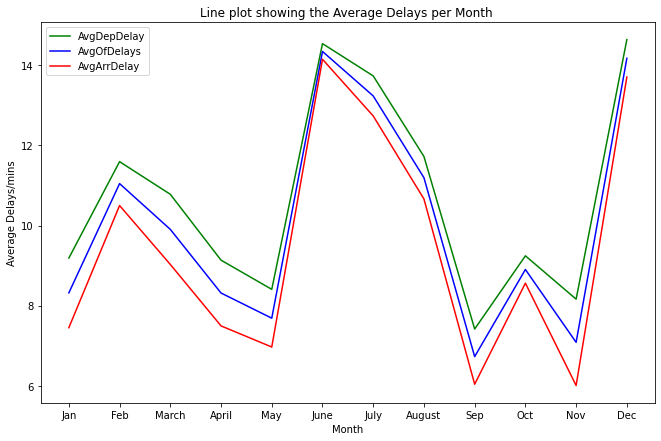

In [42]:
#Plotting a lineplot
fig, ax=plt.subplots(figsize=(11,7))
ax.plot(avgdelays_month['Month'],avgdelays_month['AvgDepDelay'],color='green',label='AvgDepDelay')
ax.plot(avgdelays_month['Month'],Avgofdelays_month,color='blue',label='AvgOfDelays')
ax.plot(avgdelays_month['Month'],avgdelays_month['AvgArrDelay'],color='red',label='AvgArrDelay')
plt.xticks(avgdelays_month['Month'],['Jan','Feb','March','April','May','June','July','August','Sep','Oct','Nov','Dec'])
ax.set_ylabel('Average Delays/mins')
ax.set_xlabel('Month')
ax.title.set_text('Line plot showing the Average Delays per Month ')
ax.legend()

September is the best month to minimise delays

## Finding the Best Time of Day to minimise delays

A new column named TotalDelay is created in datacomb

In [44]:
datacomb['TotalDelay']="NA"

In [46]:
datacomb['TotalDelay']=datacomb.ArrDelay+datacomb.DepDelay

CRSDepTime is split into 8 time intervals and a list is made below.

In [49]:
TotalDelay_Time=[datacomb[(datacomb.CRSDepTime>=0000.0) & (datacomb.CRSDepTime<0300.0)].TotalDelay,
                 datacomb[(datacomb.CRSDepTime>=0300.0) & (datacomb.CRSDepTime<0600.0)].TotalDelay,
                 datacomb[(datacomb.CRSDepTime>=0600.0) & (datacomb.CRSDepTime<0900.0)].TotalDelay,
                 datacomb[(datacomb.CRSDepTime>=0900.0) & (datacomb.CRSDepTime<1200.0)].TotalDelay, 
                 datacomb[(datacomb.CRSDepTime>=1200.0) & (datacomb.CRSDepTime<1500.0)].TotalDelay, 
                 datacomb[(datacomb.CRSDepTime>=1500.0) & (datacomb.CRSDepTime<1800.0)].TotalDelay,
                 datacomb[(datacomb.CRSDepTime>=1800.0) & (datacomb.CRSDepTime<2100.0)].TotalDelay,
                 datacomb[(datacomb.CRSDepTime>=2100.0) & (datacomb.CRSDepTime<=2400.0)].TotalDelay]

Plotting a boxplot for TotalDelay by TimeofDay

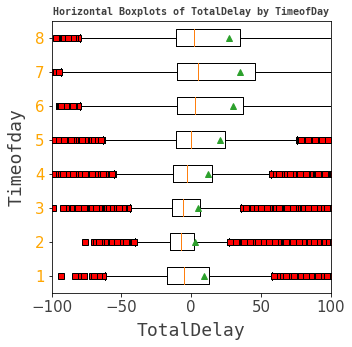

In [76]:
fig, ax = plt.subplots(figsize=(5,5))

ax.boxplot(TotalDelay_Time, vert=False, 
           flierprops=dict(markerfacecolor='r', marker='s'),
           showmeans=True)

ax.set_ylabel('Timeofday',
                 color='#404040',
                 family = 'monospace',
                 size = 18,
                 labelpad=10)
ax.set_xlabel('TotalDelay',
                 color='#404040',
                 family = 'monospace',
                 size = 18,
                 labelpad=7)
ax.set_title("Horizontal Boxplots of TotalDelay by TimeofDay",
                color='#404040',
                family = 'monospace',
                size = 10,
                weight = 'bold')
ax.tick_params(axis='x', labelcolor='#404040', labelsize=15)
ax.tick_params(axis='y', labelcolor='#ffa600', labelsize=15)
ax.set_xlim([-100,100]) # X axis limit was limited to make the plot more clearer
plt.show()

Timeofday=2 which is 00:00 to 03:00 is the best time of day to minimise delays